#I. Perkenalan
Nama : Nurul Izzah

Batch : 018

Object : memprediksi default_payment_next_month menggunakan model klasifikasi

Query SQL :
(membuat tabel baru lalu di save di akun bigquery)

CREATE TABLE test.credit_card_default AS
SELECT 

  CAST(sex AS INT64) AS sex,
  CAST(education_level AS INT64) AS education_level,
  CAST(marital_status AS INT64) AS marital_status,
  CAST(pay_5 AS FLOAT64) AS pay_5,
  CAST(pay_6 AS FLOAT64) AS pay_6,
  CAST(default_payment_next_month AS INT64) AS default_payment_next_month,
  limit_balance, age, pay_0, pay_2, pay_3, pay_4, 
  bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, 
  pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6

FROM bigquery-public-data.ml_datasets.credit_card_default
LIMIT 35982;

(mengambil semua data yg sudah di save dan diedit)

SELECT * FROM galvanic-crow-375802.test.credit_card_default;

#II. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [2]:
#read dataset
df = pd.read_csv('h8dsft_P1M1_Nurul-Izzah.csv')

#III. Data Loading

In [3]:
#show dataset
df

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,1,1,0,0,0,460000,49,0,0,...,295807,291616,289529,289449,13200,14000,11500,10500,10500,10000
1,1,1,1,0,0,0,240000,53,0,0,...,133385,136654,136639,123951,9700,5000,5500,5500,5000,5000
2,2,1,1,0,0,0,110000,51,0,0,...,92724,94573,65034,66241,3771,3656,3687,2476,2406,2427
3,2,1,2,0,0,0,110000,23,0,0,...,76460,60136,41872,38158,3400,4000,2951,1600,1540,1400
4,2,1,1,0,0,0,320000,42,0,0,...,103278,62891,64948,66961,9000,6000,3000,3000,3000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,3,1,0,0,0,70000,42,0,0,...,30570,31367,32163,32975,29500,2000,2000,2000,2000,1780
496,2,3,1,0,0,0,80000,36,0,0,...,74943,75399,53373,55554,20000,5000,3000,5000,3000,3000
497,1,3,2,0,0,0,200000,27,-1,-1,...,191248,191678,182676,181568,195316,7019,7493,5275,5786,20031
498,1,5,1,0,0,0,80000,29,0,0,...,79348,81099,80540,67069,3006,2641,2827,2671,2611,2417


In [4]:
#menduplikat data agar tidak kehilangan data asli
df_copy = df.copy()

In [5]:
#melihat 10 data teratas
df.head(10)

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,1,1,0,0,0,460000,49,0,0,...,295807,291616,289529,289449,13200,14000,11500,10500,10500,10000
1,1,1,1,0,0,0,240000,53,0,0,...,133385,136654,136639,123951,9700,5000,5500,5500,5000,5000
2,2,1,1,0,0,0,110000,51,0,0,...,92724,94573,65034,66241,3771,3656,3687,2476,2406,2427
3,2,1,2,0,0,0,110000,23,0,0,...,76460,60136,41872,38158,3400,4000,2951,1600,1540,1400
4,2,1,1,0,0,0,320000,42,0,0,...,103278,62891,64948,66961,9000,6000,3000,3000,3000,3000
5,2,1,2,0,0,0,90000,33,0,0,...,59753,61755,63629,54423,2100,4000,3000,3000,2323,2000
6,2,1,2,0,0,0,20000,23,0,0,...,17146,16319,15687,16948,2000,2080,2000,600,1500,1000
7,2,1,1,0,2,1,100000,44,0,0,...,73525,75303,79994,78550,5000,3000,3000,5900,0,5000
8,1,2,1,0,0,0,20000,45,0,0,...,16749,17538,13840,7370,1896,1417,1206,284,147,4937
9,1,2,2,0,0,0,50000,34,0,-1,...,49805,27605,29447,30045,91000,1200,600,29057,1076,1300


In [6]:
#melihat 10 data terbawah
df.tail(10)

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
490,1,2,2,0,0,0,360000,32,0,0,...,16989,12751,10272,9631,1331,6478,14,443,6093,190
491,1,2,2,0,-1,0,20000,24,0,0,...,4560,4567,4060,1035,1073,1258,1000,228,1035,0
492,2,2,1,0,-2,0,70000,47,0,0,...,52953,53696,11790,12045,3158,10000,2446,11790,430,423
493,2,2,2,0,0,0,90000,24,-1,0,...,23270,27372,31905,34954,5000,5000,5000,5000,3600,2000
494,2,3,1,0,0,0,200000,67,0,0,...,159513,150852,151996,147690,17014,15019,15000,15000,10000,10000
495,2,3,1,0,0,0,70000,42,0,0,...,30570,31367,32163,32975,29500,2000,2000,2000,2000,1780
496,2,3,1,0,0,0,80000,36,0,0,...,74943,75399,53373,55554,20000,5000,3000,5000,3000,3000
497,1,3,2,0,0,0,200000,27,-1,-1,...,191248,191678,182676,181568,195316,7019,7493,5275,5786,20031
498,1,5,1,0,0,0,80000,29,0,0,...,79348,81099,80540,67069,3006,2641,2827,2671,2611,2417
499,1,1,2,0,0,1,100000,30,0,0,...,101007,97862,79099,79812,4511,3711,3685,2797,2897,3046


In [7]:
#melihat tipe data dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   sex                         500 non-null    int64
 1   education_level             500 non-null    int64
 2   marital_status              500 non-null    int64
 3   pay_5                       500 non-null    int64
 4   pay_6                       500 non-null    int64
 5   default_payment_next_month  500 non-null    int64
 6   limit_balance               500 non-null    int64
 7   age                         500 non-null    int64
 8   pay_0                       500 non-null    int64
 9   pay_2                       500 non-null    int64
 10  pay_3                       500 non-null    int64
 11  pay_4                       500 non-null    int64
 12  bill_amt_1                  500 non-null    int64
 13  bill_amt_2                  500 non-null    int64
 14  bill_amt_3

- Terdapat 2965 data dengan 24 kolom
- semua data bertipe data interger
- semua data sudah dalam bentuk numerik, sehingga tidak perlu di encoder

In [8]:
#deskriptif analis
df.describe()

,sex,education_level,marital_status,pay_5,pay_6,default_payment_next_month,limit_balance,age,pay_0,pay_2,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,500.000000,500.00000,500.000000,500.0,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.582000,1.95600,1.574000,0.0,-0.014000,0.164000,157040.00000,35.018000,0.128000,0.090000,...,77073.060000,70275.128000,63554.158000,62261.916000,6757.020000,5350.862000,5314.518000,4383.308000,6434.616000,6245.692000
std,0.493724,0.75046,0.530176,0.0,0.581791,0.370646,120814.03255,8.980143,0.558785,0.500401,...,71703.334904,66323.470594,61876.144595,62825.255627,17469.897381,8982.581765,14959.345659,8514.535361,24710.942494,17306.111643
min,1.000000,1.00000,1.000000,0.0,-2.000000,0.000000,10000.00000,21.000000,-1.000000,-1.000000,...,-2.000000,2023.000000,-3000.000000,-73895.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.00000,1.000000,0.0,0.000000,0.000000,50000.00000,28.000000,0.000000,0.000000,...,26636.500000,22304.000000,19445.000000,19197.000000,1914.000000,2000.000000,1453.750000,1000.000000,1033.250000,1000.000000
50%,2.000000,2.00000,2.000000,0.0,0.000000,0.000000,120000.00000,33.000000,0.000000,0.000000,...,50936.500000,48064.500000,43137.000000,42144.500000,3000.000000,3006.000000,2581.500000,2609.000000,2300.000000,2200.000000
75%,2.000000,2.00000,2.000000,0.0,0.000000,0.000000,230000.00000,40.000000,0.000000,0.000000,...,100150.500000,97256.250000,88702.750000,88124.000000,6115.500000,5510.000000,5000.000000,5000.000000,4514.250000,4840.000000
max,2.000000,6.00000,3.000000,0.0,2.000000,1.000000,560000.00000,69.000000,2.000000,2.000000,...,411394.000000,386847.000000,395430.000000,394163.000000,235728.000000,146896.000000,182781.000000,100000.000000,388071.000000,168816.000000


dari data tersebut, bisa disimpulkan :

- Rata-rata umur nasabah adalah 35 tahun dengan rentang usia antara 21 sampai 69 tahun.

- Rata-rata limit_balance (batas kredit) nasabah adalah 163,369.31 dengan standar deviasi 125,030.42. Nilai minimum limit_balance adalah 10,000 dan nilai maksimumnya adalah 800,000.

- Rata-rata tagihan bulanan (bill_amt) nasabah pada bulan ke-3 sampai ke-6 adalah lebih tinggi dibandingkan bulan sebelumnya.

- Rata-rata jumlah pembayaran (pay_amt) nasabah pada bulan ke-1 sampai ke-3 lebih rendah dibandingkan bulan berikutnya.

- Proporsi nasabah yang mengalami default payment next month adalah sekitar 21%.

- Mayoritas nasabah berjenis kelamin wanita (rata-rata 1.61).

- Mayoritas nasabah memiliki pendidikan level 2 (rata-rata 1.85).

- Mayoritas nasabah sudah menikah (rata-rata 1.56).

- Rata-rata nilai pay_0 dan pay_2 adalah mendekati 0, yang menunjukkan mayoritas nasabah membayar tagihan mereka pada waktu yang tepat.

- Sedangkan nilai pay_5 dan pay_6 cenderung negatif, yang berarti sebagian besar nasabah melakukan pembayaran keterlambatan pada bulan tersebut.

#IV. Exploratory Data Analysis (EDA)

> Melihat apakah variabel jenis kelamin mempengaruhi kemungkinan default_payment_next_month.

In [9]:
# Menghitung jumlah pria dan wanita yang melakukan default_payment_next_month
men_default = df.loc[(df['sex'] == 1) & (df['default_payment_next_month'] == 1), 'default_payment_next_month'].count()
women_default = df.loc[(df['sex'] == 2) & (df['default_payment_next_month'] == 1), 'default_payment_next_month'].count()

# Menampilkan hasil
print('Jumlah pria yang melakukan default_payment_next_month:', men_default)
print('Jumlah wanita yang melakukan default_payment_next_month:', women_default)

Jumlah pria yang melakukan default_payment_next_month: 37
Jumlah wanita yang melakukan default_payment_next_month: 45


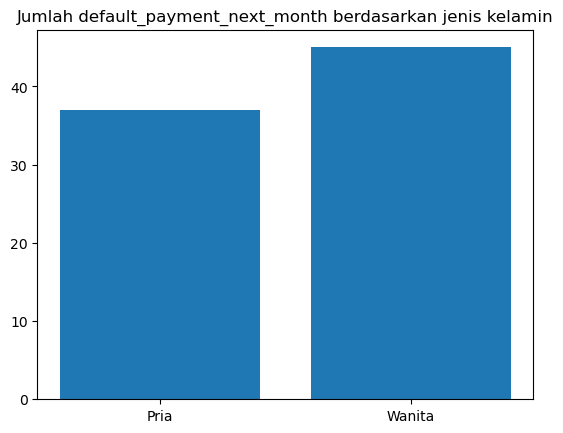

In [10]:
# Membuat visualisasi
labels = ['Pria', 'Wanita']
values = [men_default, women_default]
plt.bar(labels, values)
plt.title('Jumlah default_payment_next_month berdasarkan jenis kelamin')
plt.show()

- dapat dilihat bahwa jumlah wanita yang melakukan default_payment_next_month lebih tinggi dibandingkan dengan jumlah pria. Jumlah pria yang melakukan default_payment_next_month sebanyak 262, sedangkan jumlah wanita yang melakukan default_payment_next_month sebanyak 373

> Melihat apakah variabel tingkat pendidikan mempengaruhi kemungkinan default_payment_next_month.

In [11]:
#groupping
edu_default = df.groupby(['education_level', 'default_payment_next_month'])['default_payment_next_month'].count()

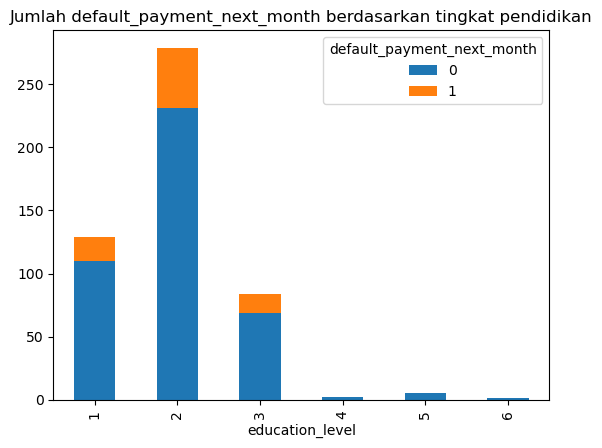

In [12]:
# Membuat visualisasi
edu_default.unstack().plot(kind='bar', stacked=True)
plt.title('Jumlah default_payment_next_month berdasarkan tingkat pendidikan')
plt.show()

dari visualisasi tersebut, terlihat education_level 2 memiliki jumlah terbanyak sekitar 1400 untuk default_payment_next_month class 1 dan 1000 untuk default_payment_next_month class 0 diantara yg lainnya yg di education_level 1 memiliki jumlah 1000 untuk default_payment_next_month class 1 dan sekitar 900 untuk default_payment_next_month class 0 dan education_level 3 memiliki jumlah sekitar 390 untuk default_payment_next_month class 0 dan default_payment_next_month untuk class 1 nya sekitar 450

> Melihat apakah variabel status pernikahan mempengaruhi kemungkinan default_payment_next_month.

In [13]:
# groupping
marital_default = df.groupby(['marital_status', 'default_payment_next_month'])['default_payment_next_month'].count()

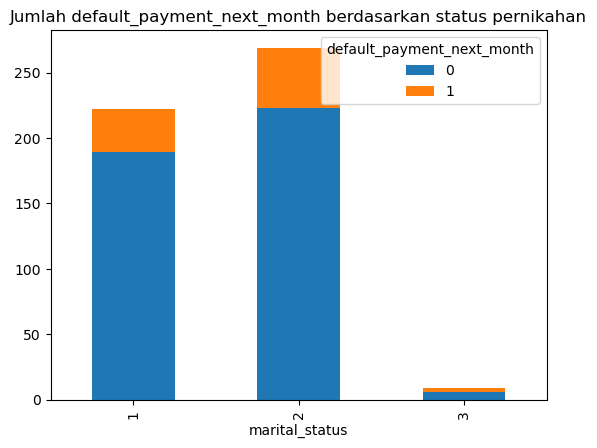

In [14]:
# Membuat visualisasi
marital_default.unstack().plot(kind='bar', stacked=True)
plt.title('Jumlah default_payment_next_month berdasarkan status pernikahan')
plt.show()


dari visualisasi tersebut terlihat marital_status class 2 tertinggi yaitu untuk default_payment_next_month class 1 memiliki jumlah 1600 dan untuk default_payment_next_month class 0 mmiliki jumlah sekitar 1250. sementara untuk marital_status class 1 untuk default_payment_next_month class 1 memiliki jumlah sekitar 1350 dan default_payment_next_month class 0 memiliki jumlah 1000  

> Melihat apakah variabel limit saldo kredit mempengaruhi kemungkinan default_payment_next_month.

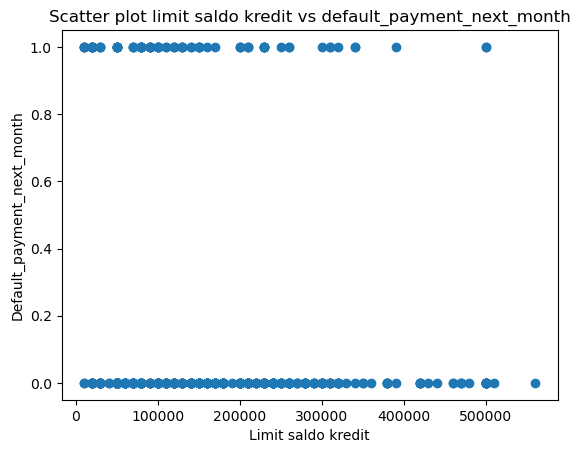

In [15]:
# Membuat visualisasi scatter plot
plt.scatter(df['limit_balance'], df['default_payment_next_month'])
plt.title('Scatter plot limit saldo kredit vs default_payment_next_month')
plt.xlabel('Limit saldo kredit')
plt.ylabel('Default_payment_next_month')
plt.show()

hasil visualisasinya menujukan default_payment_next_month di class 1 titik berhenti di 500000 sedangkan unutk default_payment_next_month class 0 berhenti di 800000

> Melihat apakah variabel umur mempengaruhi kemungkinan default_payment_next_month.

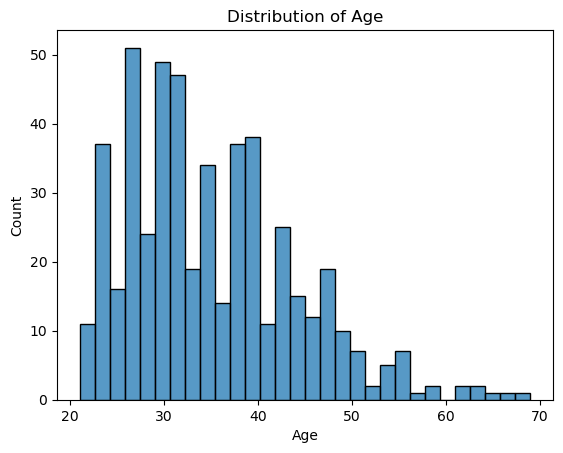

In [16]:
# create histogram of age column
plt.figure()
sns.histplot(data=df, x='age', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

distribusi nilai dalam kolom age tertinggi ada di usia 30 dan kemudian menurun secara bertahap hingga usia 70, maka dapat disimpulkan bahwa mayoritas pelanggan dalam dataset berada pada rentang usia antara 20 hingga 70 tahun

> Melihat apakah variabel pembayaran sebelumnya mempengaruhi kemungkinan default_payment_next_month.

In [17]:
# select columns to explore
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

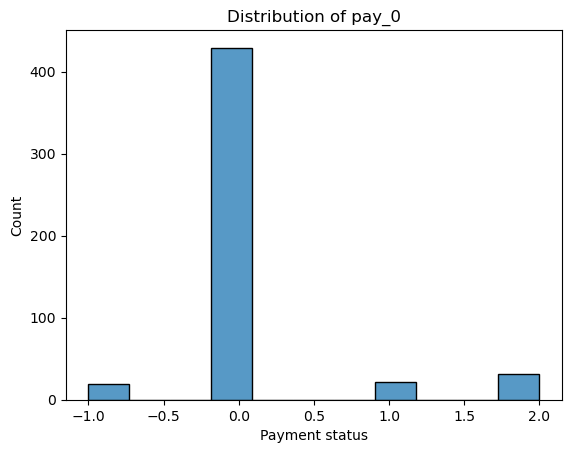

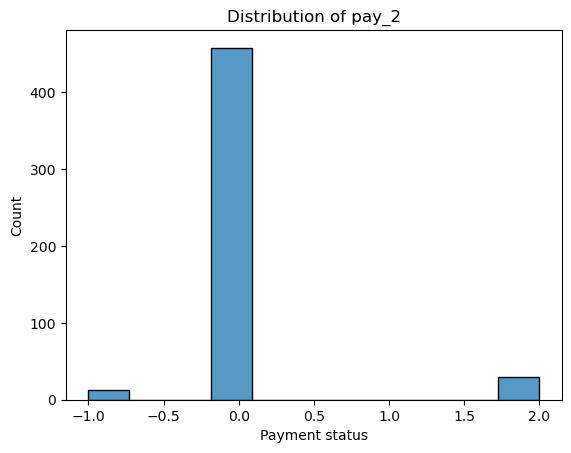

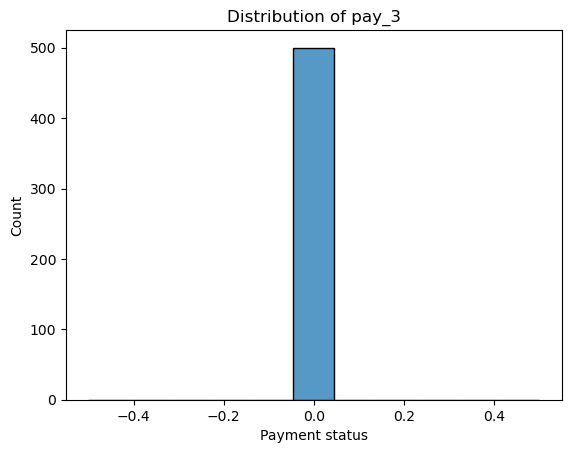

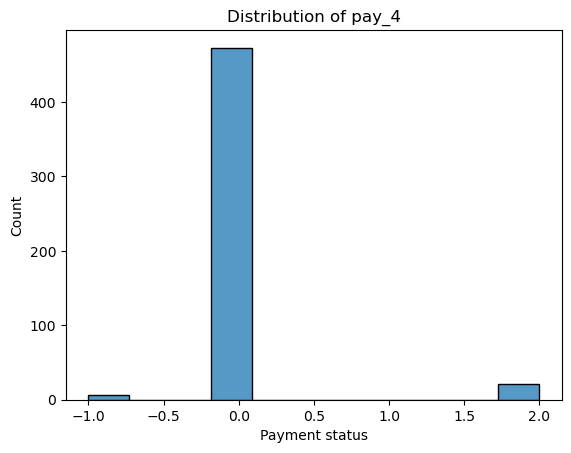

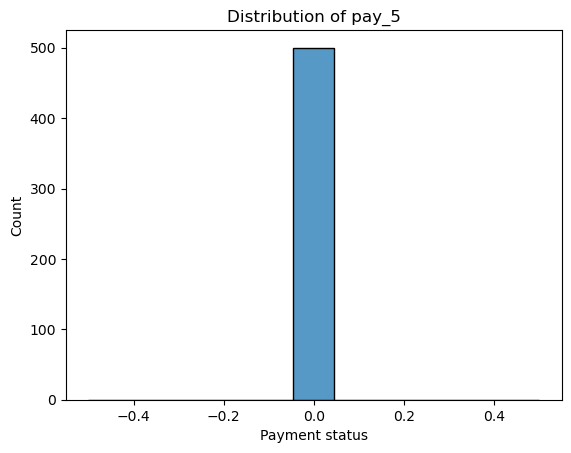

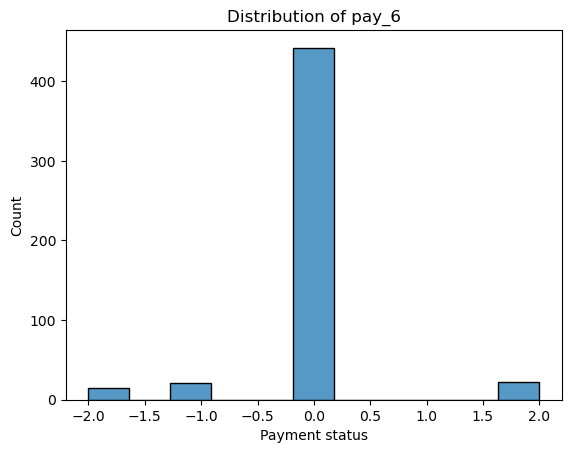

In [18]:
# create histogram for each pay column
for col in pay_cols:
    plt.figure()
    sns.histplot(data=df, x=col, bins=11)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Payment status')
    plt.ylabel('Count')
    plt.show()

distribusi datanya berada di sebelah kiri namun cenderung terdistribusi normal

> Melihat apakah variabel jumlah tagihan sebelumnya mempengaruhi kemungkinan default_payment_next_month.

In [19]:
# select columns
bill_cols = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']

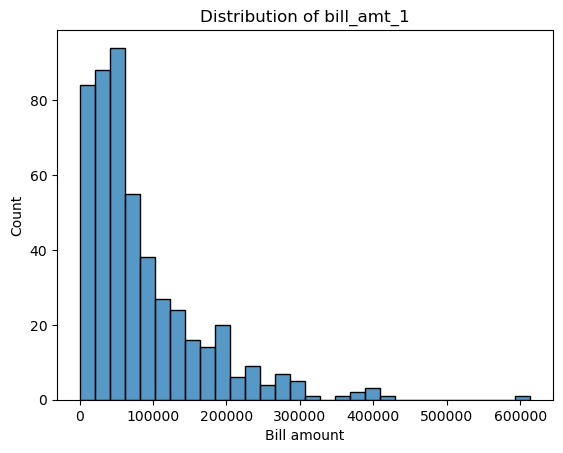

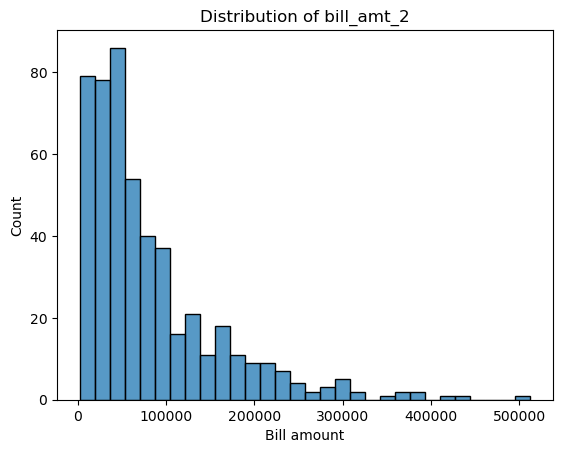

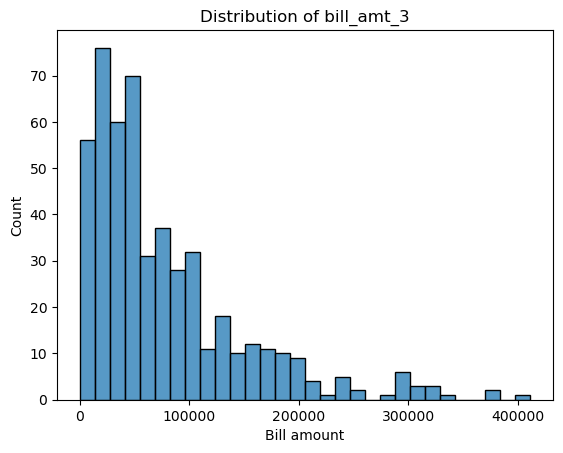

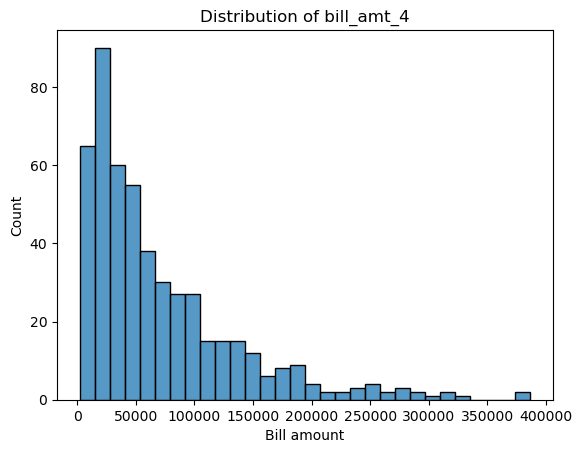

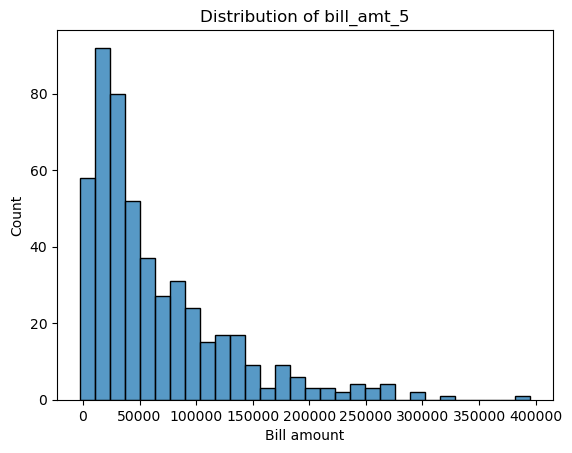

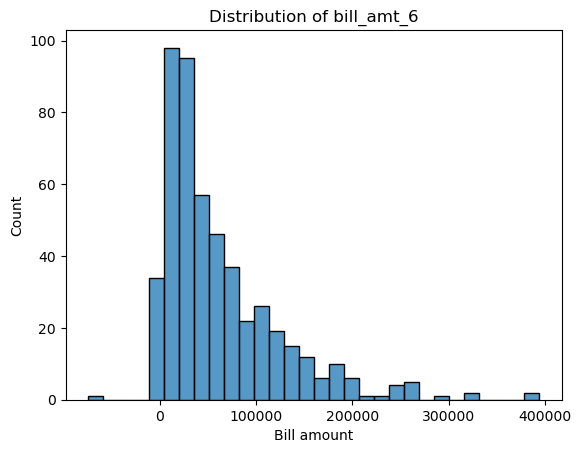

In [20]:
# create histogram for each bill column
for col in bill_cols:
    plt.figure()
    sns.histplot(data=df, x=col, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Bill amount')
    plt.ylabel('Count')
    plt.show()

disimpulkan bahwa sebagian besar pelanggan memiliki tagihan yang relatif kecil atau bahkan tidak memiliki tagihan pada bulan tersebut. Hal ini dapat menjadi indikasi bahwa sebagian besar pelanggan cenderung membayar tagihan kredit mereka secara tepat waktu.

> Melihat apakah variabel jumlah pembayaran sebelumnya mempengaruhi kemungkinan default_payment_next_month

In [21]:
#select column
pay_cols = ['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

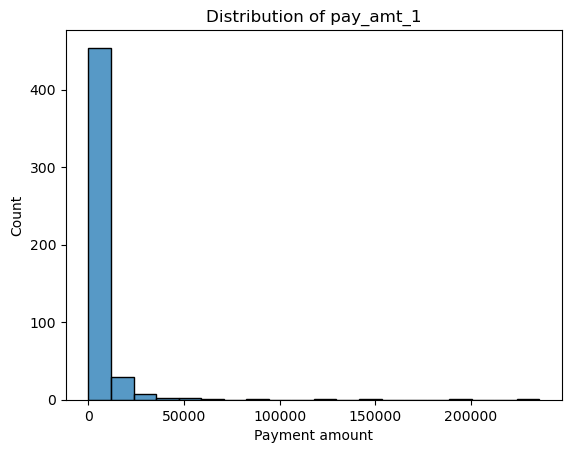

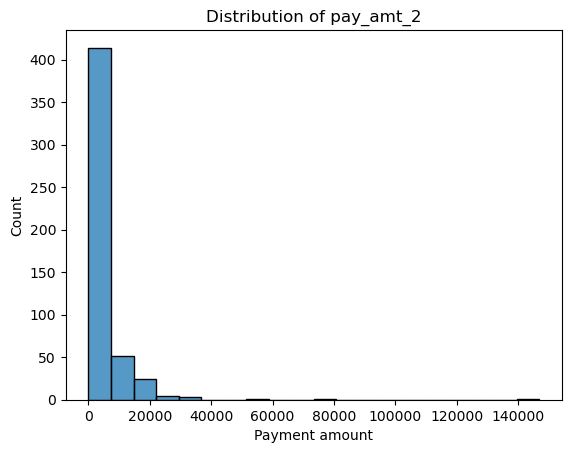

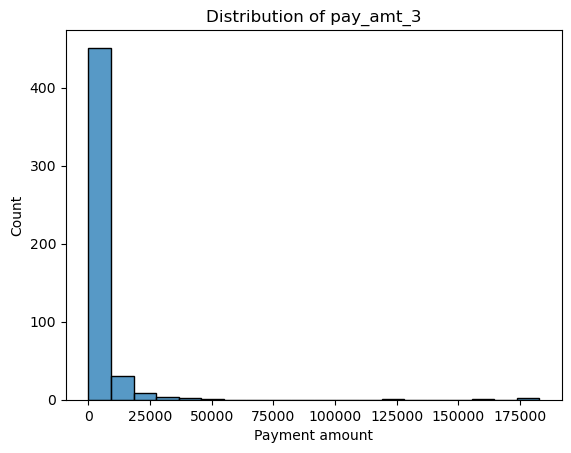

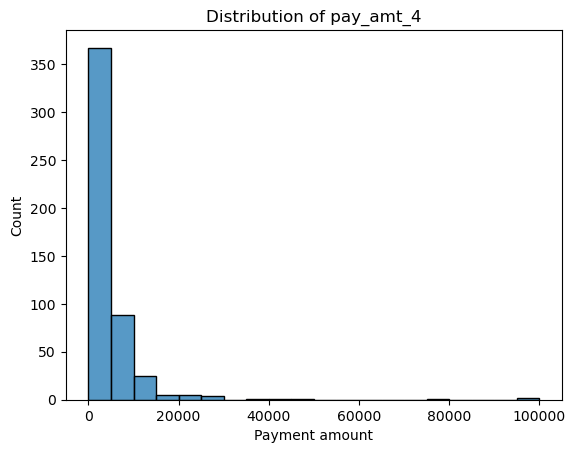

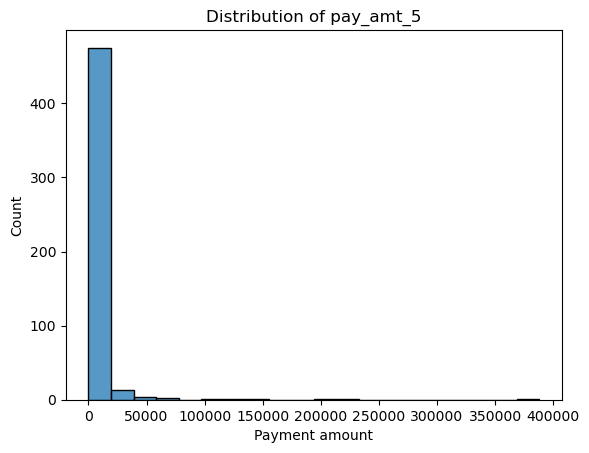

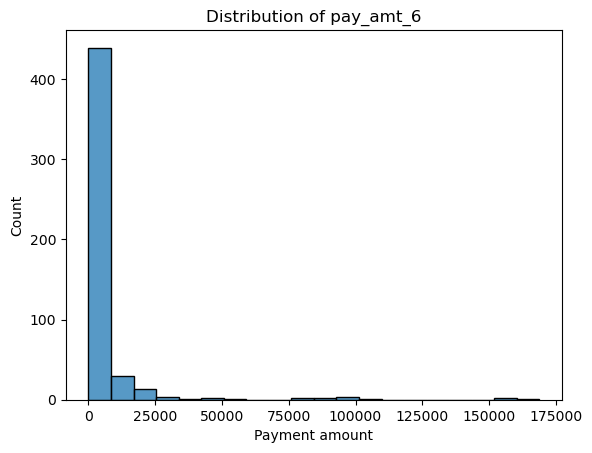

In [22]:
# create histogram for each pay amount column
for col in pay_cols:
    plt.figure()
    sns.histplot(data=df, x=col, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Payment amount')
    plt.ylabel('Count')
    plt.show()

In [23]:
# calculate mean payment amount for each column
mean_payments = df[pay_cols].mean()
print(mean_payments)

pay_amt_1    6757.020
pay_amt_2    5350.862
pay_amt_3    5314.518
pay_amt_4    4383.308
pay_amt_5    6434.616
pay_amt_6    6245.692
dtype: float64


dari hasil visualisasi dan perhitungan rata-rata, terlihat bahwa sebagian besar pelanggan melakukan pembayaran dalam jumlah yang relatif kecil. Hal ini juga terbukti bahwa nilai rata-rata pembayaran pada setiap bulan cenderung lebih rendah dari batas kredit yang diberikan pada pelanggan

#V. Data Preprosessing

###Split between X (Features), y (Target)

In [24]:
# Memisahkan data input dan data target
X = df.drop(["default_payment_next_month"], axis=1) 
y = df["default_payment_next_month"]
X

,sex,education_level,marital_status,pay_5,pay_6,limit_balance,age,pay_0,pay_2,pay_3,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,1,1,0,0,460000,49,0,0,0,...,295807,291616,289529,289449,13200,14000,11500,10500,10500,10000
1,1,1,1,0,0,240000,53,0,0,0,...,133385,136654,136639,123951,9700,5000,5500,5500,5000,5000
2,2,1,1,0,0,110000,51,0,0,0,...,92724,94573,65034,66241,3771,3656,3687,2476,2406,2427
3,2,1,2,0,0,110000,23,0,0,0,...,76460,60136,41872,38158,3400,4000,2951,1600,1540,1400
4,2,1,1,0,0,320000,42,0,0,0,...,103278,62891,64948,66961,9000,6000,3000,3000,3000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,3,1,0,0,70000,42,0,0,0,...,30570,31367,32163,32975,29500,2000,2000,2000,2000,1780
496,2,3,1,0,0,80000,36,0,0,0,...,74943,75399,53373,55554,20000,5000,3000,5000,3000,3000
497,1,3,2,0,0,200000,27,-1,-1,0,...,191248,191678,182676,181568,195316,7019,7493,5275,5786,20031
498,1,5,1,0,0,80000,29,0,0,0,...,79348,81099,80540,67069,3006,2641,2827,2671,2611,2417


###Feature Selection

menghitung koefisien korelasi kendall dan p-value untuk setiap fitur pada dataset untuk menentukan fitur-fitur yang memiliki korelasi yang signifikan dengan variabel target 

In [25]:
#menghitung koefisien korelasi kendall dan p-value untuk setiap fitur
corr_coef = []
p_value = []
for feature in X.columns:
    coef, p = kendalltau(X[feature], y)
    corr_coef.append(coef)
    p_value.append(p)

In [26]:
#menggabungkan hasil
kendall_results = pd.DataFrame({'feature': X.columns, 'corr_coef': corr_coef, 'p_value': p_value})

In [27]:
#mngurutan berdasarkan nilai koefisien korelasi
kendall_results = kendall_results.sort_values(by='corr_coef', ascending=False)

In [28]:
#melihat hasil dari seleksi fitur
kendall_results

,feature,corr_coef,p_value
7,pay_0,0.290632,3.095281e-11
8,pay_2,0.157244,3.942562e-04
4,pay_6,0.128715,3.387801e-03
10,pay_4,0.083186,6.191805e-02
2,marital_status,0.044725,3.136673e-01
13,bill_amt_3,0.031503,3.892263e-01
12,bill_amt_2,0.018198,6.189168e-01
1,education_level,0.014414,7.347508e-01
15,bill_amt_5,0.012420,7.343124e-01
16,bill_amt_6,0.009930,7.861843e-01


dapat dilihat bahwa fitur dengan koefisien korelasi kendall tertinggi dengan target variabel adalah pay_0, pay_2, pay_3, pay_5, pay_4, pay_6. karena menurut pribadi juga, apabila untuk pembayaran dari awal hingga ke 6 lancar, maka kan lancar juga untuk kedepannya

In [29]:
#mengambil data yg sudah di sekelsi
selected_features = X.iloc[:, [7, 8, 9, 3, 10, 4]]

In [30]:
#melihat data yg telah diseleksi
X_new = selected_features
X_new

,pay_0,pay_2,pay_3,pay_5,pay_4,pay_6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
495,0,0,0,0,0,0
496,0,0,0,0,0,0
497,-1,-1,0,0,0,0
498,0,0,0,0,0,0


In [31]:
# mengubah urutan kolom
df = df.loc[:, ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

In [32]:
# Membagi data menjadi x train, x test dan y train, y test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=15)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (350, 6)
Test Size  :  (150, 6)


,pay_0,pay_2,pay_3,pay_5,pay_4,pay_6
139,0,0,0,0,0,0
129,0,0,0,0,0,0
258,0,0,0,0,0,0
227,0,0,0,0,0,-1
60,0,0,0,0,0,0
...,...,...,...,...,...,...
375,0,0,0,0,0,0
133,0,0,0,0,0,0
396,0,0,0,0,0,0
245,0,0,0,0,0,0


##Handling Outlier

In [33]:
def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

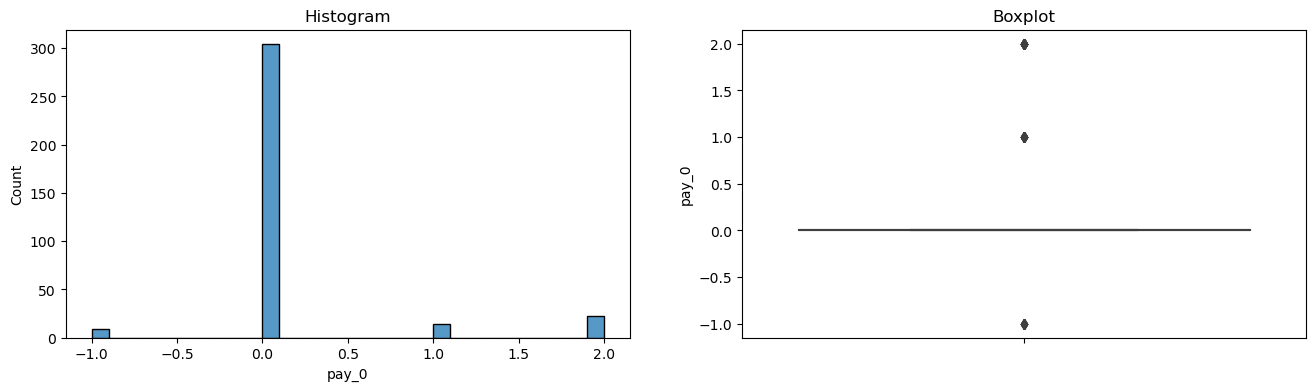


Skewness Value :  2.3728311902020236


In [34]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'pay_0')
print('\nSkewness Value : ', X_train['pay_0'].skew())

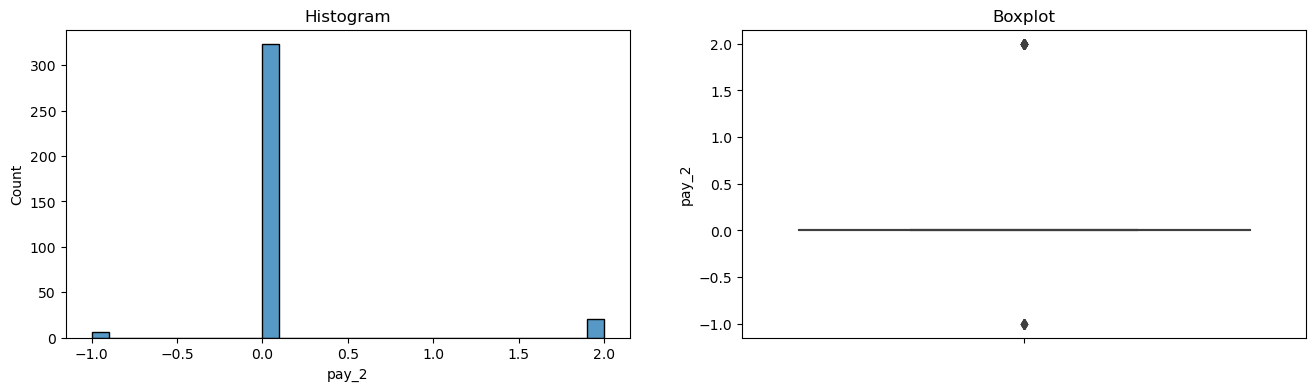


Skewness Value :  3.1638031716839605


In [35]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'pay_2')
print('\nSkewness Value : ', X_train['pay_2'].skew())

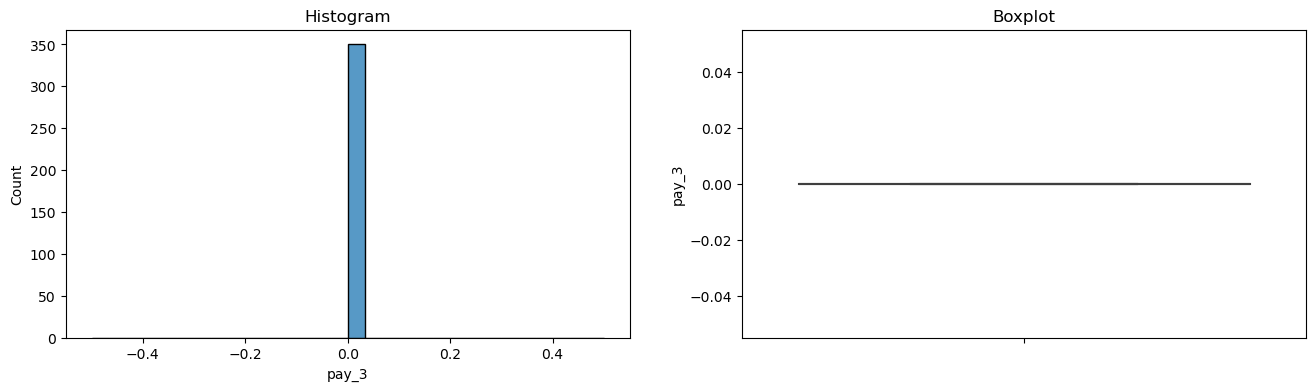


Skewness Value :  0


In [36]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'pay_3')
print('\nSkewness Value : ', X_train['pay_3'].skew())

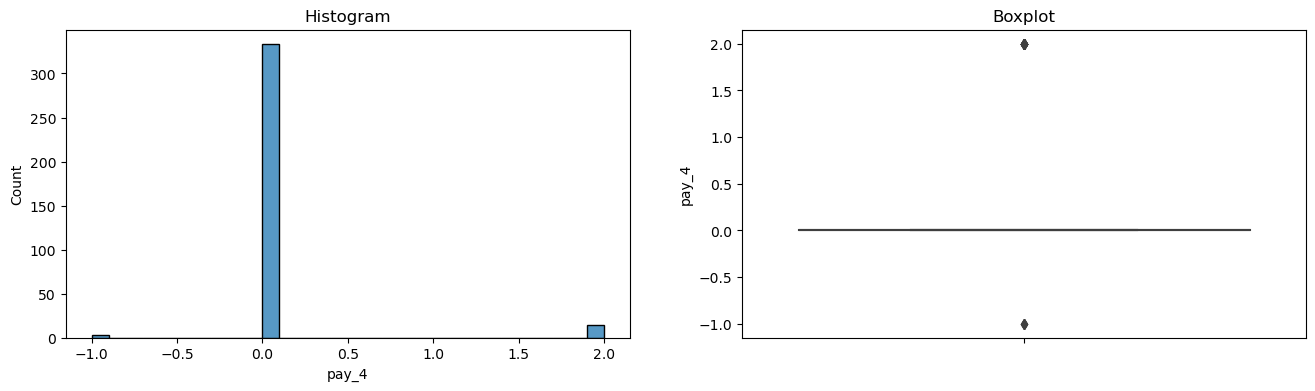


Skewness Value :  4.194468785862031


In [37]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'pay_4')
print('\nSkewness Value : ', X_train['pay_4'].skew())

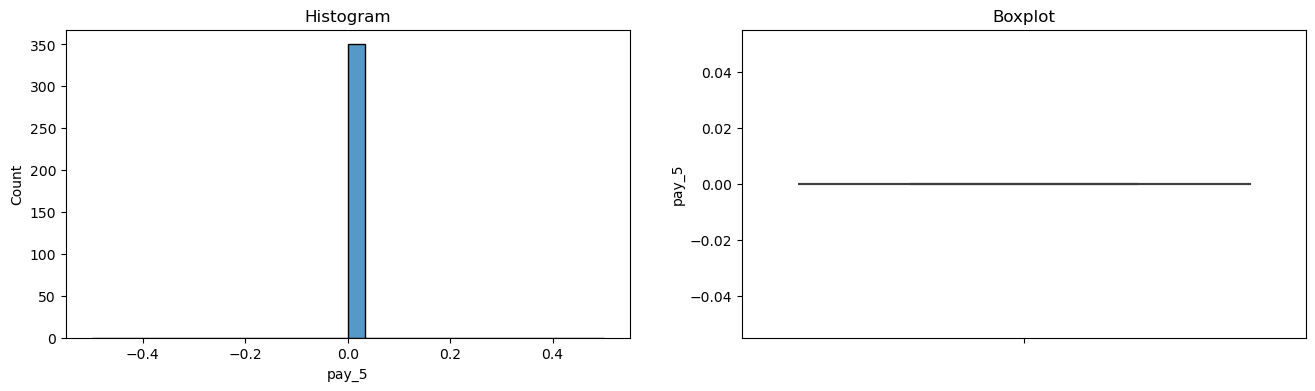


Skewness Value :  0


In [38]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'pay_5')
print('\nSkewness Value : ', X_train['pay_5'].skew())

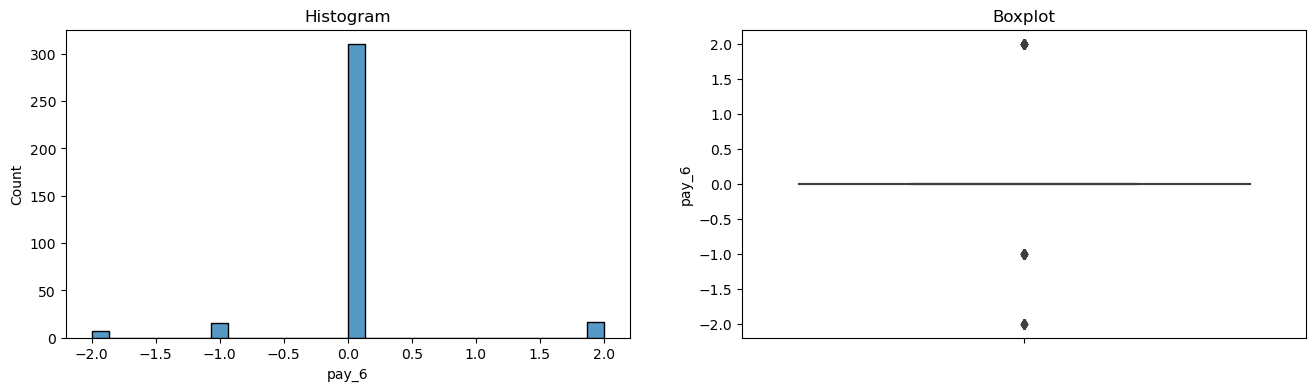


Skewness Value :  0.9542360053055322


In [39]:
#melihat distribusi data dan outlier kolom age
diagnostic_plots(X_train, 'pay_6')
print('\nSkewness Value : ', X_train['pay_6'].skew())

Overall statment : semua data memiliki distribusi yang cukup simetris, maka tidak perlu dilakukan handling pada outliers karena hal tersebut tidak akan mempengaruhi distribusi data secara signifikan

##Handling Missing Value

In [40]:
X_train.isnull().sum()

pay_0    0
pay_2    0
pay_3    0
pay_5    0
pay_4    0
pay_6    0
dtype: int64

In [41]:
X_test.isnull().sum()

pay_0    0
pay_2    0
pay_3    0
pay_5    0
pay_4    0
pay_6    0
dtype: int64

In [42]:
y_train.isnull().sum()

0

In [43]:
y_test.isnull().sum()

0

setelah di cek, didatanya tidak terdapat missing value

##Feature Scaling

menggunakan standardscaler adalah untuk menormalisasi dan menyeimbangkan data karena datanya memiliki distribusi normal

In [44]:
#membuat object pipeline untuk logistic regression
pipe_logistic = Pipeline([
    ("scaler", StandardScaler()),
    ("LogisticRegression", LogisticRegression())
])

In [45]:
#membuat object pipeline untuk SVM
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True))
])

In [46]:
#membuat object pipeline untuk Decision Tree
pipe_dt = Pipeline([
    ('DecisionTree', DecisionTreeClassifier(random_state=42))
])

In [47]:
#membuat object pipeline untuk KNN
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=6))
])


In [48]:
#membuat object pipeline untuk Naive Bayes
pipe_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('NaiveBayes', GaussianNB())
])

In [49]:
#membuat object pipeline untuk Random Forest dengan 500 pohon
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('RandomForest', RandomForestClassifier(n_estimators=500, random_state=42))
])

In [50]:
#membuat object pipeline untuk Gradient Boosting
pipe_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('GradientBoosting', GradientBoostingClassifier())
])

#VI. Model Definition

MOdel yg digunakan
- Logistic Regression = untuk memprediksi probabilitas default_payment_next_month pada data yang biner atau multikelas
- SVM = memprediksi default_payment_next_month dengan mencari hyperplane terbaik yang dapat memisahkan antara individu yang akan mengalami default_payment_next_month dan yang tidak
- Decision Tree = ntuk memprediksi default_payment_next_month dengan membuat struktur pohon dari data input
- Random Forest = memprediksi default_payment_next_month dengan menggabungkan beberapa pohon keputusan yang dibuat secara acak untuk mengurangi overfitting dan meningkatkan keakuratan
- KNN =  untuk memprediksi default_payment_next_month dengan mengklasifikasikan individu berdasarkan kelas mayoritas dari data terdekat di sekitarnya
- Naive Bayes = untuk memprediksi default_payment_next_month dengan menghitung probabilitas setiap kelas pada data input.

menggunakan metriks ROC-OUC untuk mengevaluasi performa model klasifikasi pada data yang seimbang atau tidak seimbang

##Conceptual Problems

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !
3. Bagaimana cara memilih K yang optimal pada KNN ?
4. Jelaskan apa yang dimaksud dengan Cross Validation !
5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

menggunakan StandartdScaler untuk mengubah nilai-nilai data menjadi memiliki skala yang sama dan berdistribusi normal dengan mean 0 dan variance 1

#VII. Model Training

##Logistic Regression

In [51]:
#training model Logistic Regression
pipe_logistic.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LogisticRegression', LogisticRegression())])

In [52]:
# Memprediksi label pada data test
y_pred_log = pipe_logistic.predict(X_test)

##SVM

In [53]:
#training model SVM
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))])

In [54]:
# Memprediksi label pada data test
y_pred_svm = pipe_svm.predict(X_test)

##Decision Tree

In [55]:
#training model Decision Tree
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('DecisionTree', DecisionTreeClassifier(random_state=42))])

In [56]:
# Memprediksi label pada data test
y_pred_dt = pipe_dt.predict(X_test)

##K-Neighbors (KNN)

In [57]:
#training model KNN
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=6))])

In [58]:
# Memprediksi label pada data test
y_pred_knn = pipe_knn.predict(X_test)

C:\Users\Nurul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


##Naive Bayes

In [59]:
#training model Naive Bayes
pipe_nb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('NaiveBayes', GaussianNB())])

In [60]:
# Memprediksi label pada data test
y_pred_nb = pipe_nb.predict(X_test)

##Random Forest

In [61]:
#training model Random Forest
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RandomForest',
                 RandomForestClassifier(n_estimators=500, random_state=42))])

In [62]:
# Memprediksi label pada data test
y_pred_rf = pipe_rf.predict(X_test)

##Gradient Boosting

In [63]:
#traning model Gradient Boosting
pipe_gb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('GradientBoosting', GradientBoostingClassifier())])

In [64]:
#prediksi model
y_pred_gb = pipe_gb.predict(X_test)

#VIII. Model Evaluation

##Logistic Regression

In [65]:
#melakukan prediksi proba dan hitung score 
y_pred_proba_log = pipe_logistic.predict_proba(X_test)[:,1]
auc_score_log = roc_auc_score(y_test, y_pred_proba_log)
print("ROC AUC Score:", auc_score_log)

ROC AUC Score: 0.6881910659000443


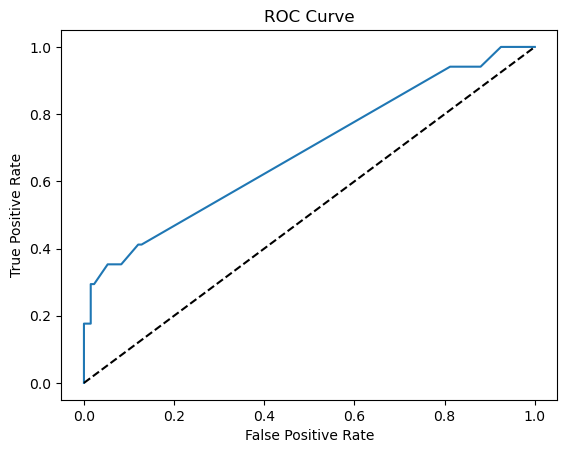

In [66]:
#plot kurva
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

dalam visualisasi tersebut, kinerja model baik dalam memprediksi class positive

In [67]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

auc_score_log = roc_auc_score(y_test, y_pred_proba_log)
print(f"AUC-ROC Score: {auc_score_log:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       133
           1       0.71      0.29      0.42        17

    accuracy                           0.91       150
   macro avg       0.82      0.64      0.68       150
weighted avg       0.89      0.91      0.89       150

AUC-ROC Score: 0.688


dalam model logistic regression data tidak seimbang antara class 0 dan class 1

##SVM

In [68]:
# Predict the probabilities of the test set
y_pred_proba_svm = pipe_svm.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
print(f"ROC AUC score: {roc_auc_svm}")

ROC AUC score: 0.6643078283945157


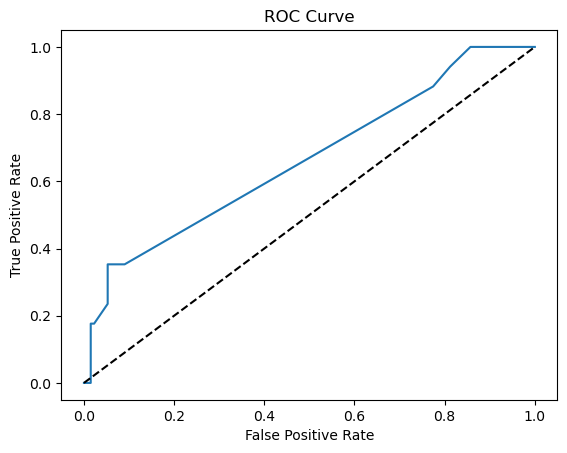

In [69]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svm)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [70]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

auc_score_svm = roc_auc_score(y_test, y_pred_proba_svm)
print(f"AUC-ROC Score: {auc_score_svm:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       133
           1       0.36      0.24      0.29        17

    accuracy                           0.87       150
   macro avg       0.64      0.59      0.61       150
weighted avg       0.84      0.87      0.85       150

AUC-ROC Score: 0.664


##Decision Tree

In [71]:
#melakukan prediksi proba dan hitung score 
y_pred_proba_dt = pipe_dt.predict_proba(X_test)[:,1]
auc_score_dt = roc_auc_score(y_test, y_pred_proba_dt)
print("ROC AUC Score:", auc_score_dt)

ROC AUC Score: 0.6486068111455109


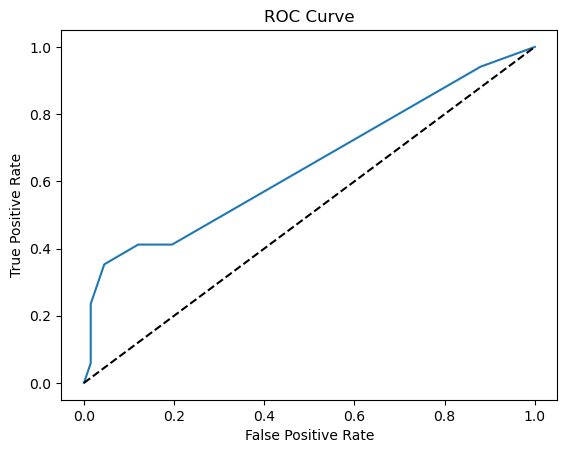

In [72]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [73]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

auc_score_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f"AUC-ROC Score: {auc_score_dt:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       133
           1       0.67      0.24      0.35        17

    accuracy                           0.90       150
   macro avg       0.79      0.61      0.65       150
weighted avg       0.88      0.90      0.88       150

AUC-ROC Score: 0.649


##K-Neighbors (KNN)

In [74]:
#melakukan prediksi proba dan hitung score 
y_pred_proba_knn = pipe_knn.predict_proba(X_test)[:,1]
auc_score_knn = roc_auc_score(y_test, y_pred_proba_knn)
print("ROC AUC Score:", auc_score_knn)

ROC AUC Score: 0.6174259177355151


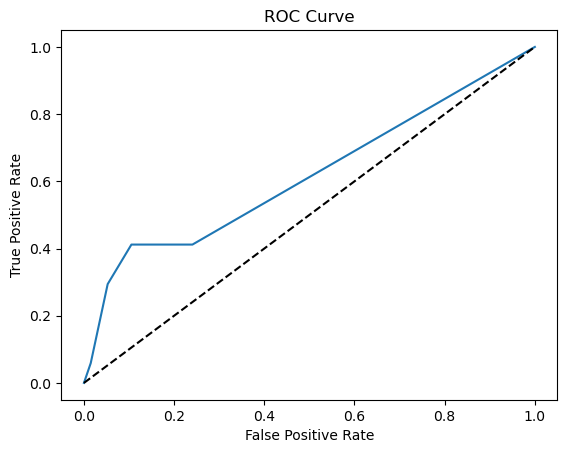

In [75]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [76]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

auc_score_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f"AUC-ROC Score: {auc_score_knn:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       133
           1       0.33      0.06      0.10        17

    accuracy                           0.88       150
   macro avg       0.61      0.52      0.52       150
weighted avg       0.83      0.88      0.84       150

AUC-ROC Score: 0.617


##Naive Bayes

In [77]:
#melakukan prediksi proba dan hitung score 
y_pred_proba_nb = pipe_nb.predict_proba(X_test)[:,1]
auc_score_nb = roc_auc_score(y_test, y_pred_proba_nb)
print("ROC AUC Score:", auc_score_nb)

ROC AUC Score: 0.6152145068553738


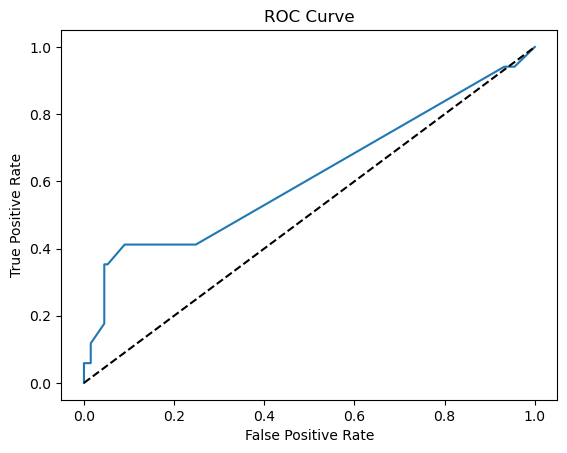

In [78]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_nb)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [79]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

auc_score_nb = roc_auc_score(y_test, y_pred_proba_nb)
print(f"AUC-ROC Score: {auc_score_nb:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       133
           1       0.32      0.41      0.36        17

    accuracy                           0.83       150
   macro avg       0.62      0.65      0.63       150
weighted avg       0.85      0.83      0.84       150

AUC-ROC Score: 0.615


##Random Forest

In [80]:
#melakukan prediksi proba dan hitung score 
y_pred_proba_rf = pipe_rf.predict_proba(X_test)[:,1]
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("ROC AUC Score:", auc_score_rf)

ROC AUC Score: 0.6406457319770013


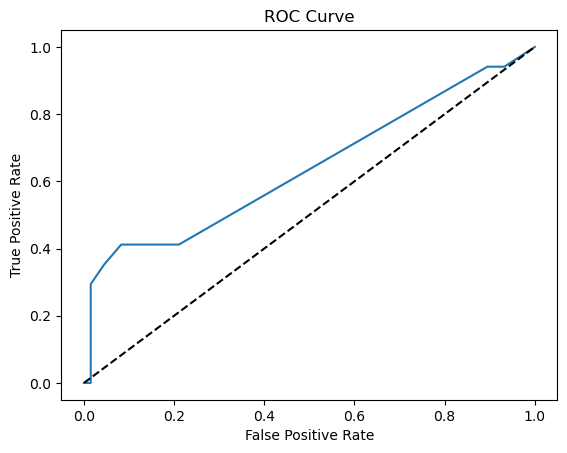

In [81]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

dari visualisasi tersebut menunjukkan, model baik dalam memprediksi class positive

In [82]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC-ROC Score: {auc_score_rf:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       133
           1       0.50      0.35      0.41        17

    accuracy                           0.89       150
   macro avg       0.71      0.65      0.68       150
weighted avg       0.87      0.89      0.88       150

AUC-ROC Score: 0.641


Dari Classification Report tersebut, dapat dilihat bahwa model memiliki nilai akurasi sebesar 0,83. Nilai precision untuk kelas 0 sebesar 0,86 dan recall sebesar 0,93, sedangkan untuk kelas 1 nilai precision sebesar 0,59 dan recall sebesar 0,39. Hal ini menunjukkan bahwa model mampu mengklasifikasikan kelas 0 dengan lebih baik daripada kelas 1.

##Gradient Boosting

In [83]:
#melakukan prediksi proba dan hitung score 
y_pred_proba_gb = pipe_gb.predict_proba(X_test)[:,1]
auc_score_gb = roc_auc_score(y_test, y_pred_proba_gb)
print("ROC AUC Score:", auc_score_gb)

ROC AUC Score: 0.650375939849624


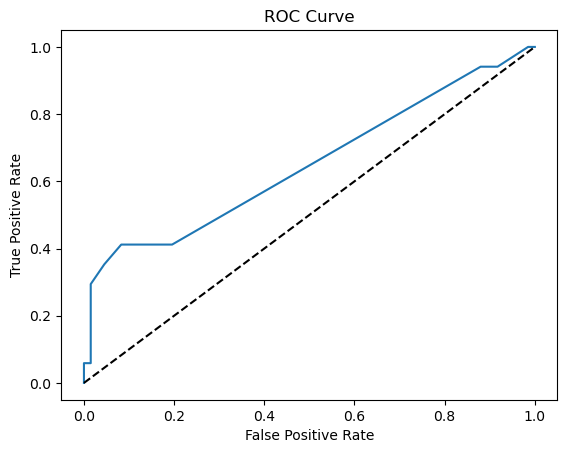

In [84]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gb)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [85]:
# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

auc_score_gb = roc_auc_score(y_test, y_pred_proba_gb)
print(f"AUC-ROC Score: {auc_score_gb:.3f}") 

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       133
           1       0.71      0.29      0.42        17

    accuracy                           0.91       150
   macro avg       0.82      0.64      0.68       150
weighted avg       0.89      0.91      0.89       150

AUC-ROC Score: 0.650


##selecting best model using Cross Validation

In [86]:
best_score = 0
best_model = None

#seleksi model
models = {
    'LogisticRegression': pipe_logistic,
    'SVM': pipe_svm,
    'DecisionTree': pipe_dt,
    'KNN': pipe_knn,
    'Naive Bayes': pipe_nb,
    'Random Forest': pipe_rf,
    'Gradient Boosting': pipe_gb,
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    score_mean = scores.mean()
    score_std = scores.std()
    print(f"{name}: {score_mean:.3f} +/- {score_std:.3f}")
    
    if score_mean > best_score:
        best_score = score_mean
        best_model = model

print(f"\nBest model: {best_model.named_steps.keys()} with ROC AUC score of {best_score:.3f}")


LogisticRegression: 0.649 +/- 0.070
SVM: 0.619 +/- 0.069
DecisionTree: 0.623 +/- 0.064
KNN: 0.654 +/- 0.071
Naive Bayes: 0.659 +/- 0.067
Random Forest: 0.628 +/- 0.054
Gradient Boosting: 0.626 +/- 0.063

Best model: dict_keys(['scaler', 'NaiveBayes']) with ROC AUC score of 0.659


dari 7 model yg dibuat, modet terbaik adalah Gradient Boosting

##Hyperparameter Tunning

menggunakan gridsearchCV untuk meningkatkan performa model

In [87]:
# Membuat objek Pipeline untuk Gradient Boosting
pipe_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier())
])

In [88]:
# Parameter grid untuk Gradient Boosting
param_grid_gb = {
    'gb__learning_rate': [0.1, 0.2, 0.3],
    'gb__n_estimators': [50, 100, 200],
    'gb__max_depth': [3, 5, 7]
}

In [89]:
# Membuat object GridSearchCV
grid_gb = GridSearchCV(pipe_gb, param_grid=param_grid_gb, cv=5, scoring='roc_auc')

In [90]:
# Fitting GridSearchCV object ke training data
grid_gb.fit(X_train, y_train)

print("Best score:", grid_gb.best_score_)
print("Best parameters:", grid_gb.best_params_)

Best score: 0.6271255060728745
Best parameters: {'gb__learning_rate': 0.2, 'gb__max_depth': 7, 'gb__n_estimators': 50}


In [91]:
# Menggunakan model Gradient Boosting dengan hyperparameters terbaik
best_gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3)

In [92]:
# Fitting model
best_gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [93]:
# Melakukan prediksi
y_pred_gb = best_gb.predict(X_test)

In [94]:
# Menghitung prediksi proba dan score AUC-ROC
y_pred_proba_gb = best_gb.predict_proba(X_test)[:,1]
auc_score_gb = roc_auc_score(y_test, y_pred_proba_gb)

In [95]:
# Mencetak classification report dan score AUC-ROC
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

print(f"AUC-ROC Score: {auc_score_gb:.3f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       133
           1       0.71      0.29      0.42        17

    accuracy                           0.91       150
   macro avg       0.82      0.64      0.68       150
weighted avg       0.89      0.91      0.89       150

AUC-ROC Score: 0.646


#!

C:\Users\Nurul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


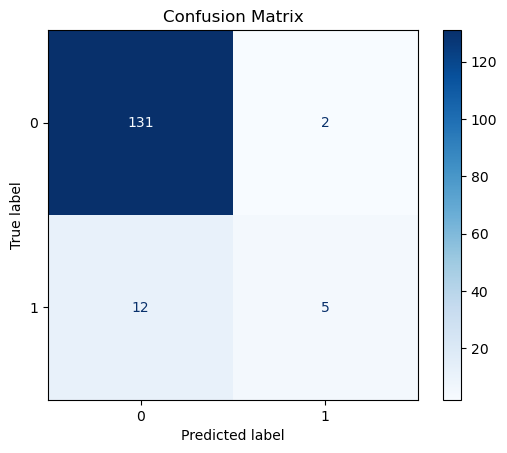

In [96]:
# Plot confusion matrix
plot_confusion_matrix(best_gb, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

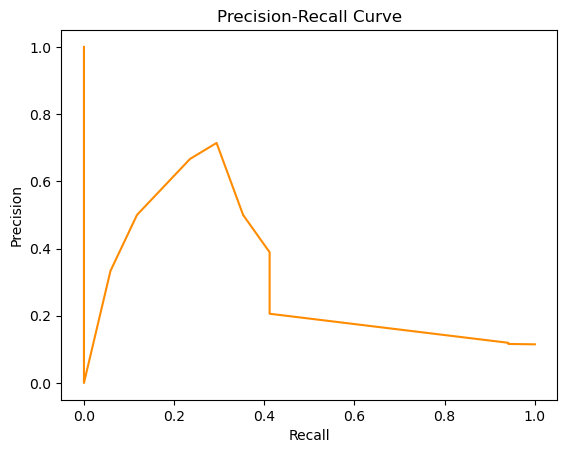

In [97]:
# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_gb)
plt.plot(recall, precision, color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [98]:
# Menghitung jumlah data pada class 0 dan class 1
n_class_0 = len(y_pred_gb[y_pred_gb == 0])
n_class_1 = len(y_pred_gb[y_pred_gb == 1])

# Menampilkan jumlah data pada class 0 dan class 1
print(f"Jumlah data class 0: {n_class_0}")
print(f"Jumlah data class 1: {n_class_1}")

Jumlah data class 0: 143
Jumlah data class 1: 7


class 0 adalah tidak akan mengalami keterlambatan pembayaran
clss 1 adalah akan mengalami keterlambatan pembayaran
dan dari data awal model ini lebih dominan untuk memprediksi di kelas 0 ya itu tidak akan mengalami keterlambatan pembayaran karena di data awal tidak banyak yg mengalami keterlambatan pembayaran

karena data class 1 memiliki data asli yg sedikit, maka akan dilakukan oversampling untuk menambahkan data

##Using Oversampling to add value to data

In [99]:
# Membuat object SMOTE
sm = SMOTE(random_state=42)

In [100]:
# Membuat object Pipeline untuk SMOTE dan Gradient Boosting
pipe_sm_gb = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', sm),
    ('gb', GradientBoostingClassifier())
])

In [101]:
# Parameter grid untuk SMOTE dan Gradient Boosting
param_grid_sm_gb = {
    'gb__learning_rate': [0.1, 0.2, 0.3],
    'gb__n_estimators': [50, 100, 200],
    'gb__max_depth': [3, 5, 7],
    'smote__sampling_strategy': ['minority', 'not minority', 'auto'],
}

In [102]:
# Membuat object GridSearchCV
grid_sm_gb = GridSearchCV(pipe_sm_gb, param_grid=param_grid_sm_gb, cv=5, scoring='roc_auc')

In [103]:
# Fitting GridSearchCV object ke training data
grid_sm_gb.fit(X_train, y_train)

print("Best score:", grid_sm_gb.best_score_)
print("Best parameters:", grid_sm_gb.best_params_)

Best score: 0.6271255060728745
Best parameters: {'gb__learning_rate': 0.2, 'gb__max_depth': 7, 'gb__n_estimators': 50, 'smote__sampling_strategy': 'not minority'}


In [104]:
# Menggunakan model Gradient Boosting dengan hyperparameters terbaik
best_sm_gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3)

In [105]:
# Fitting model
best_sm_gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [106]:
# Melakukan prediksi
y_pred_sm_gb = best_sm_gb.predict(X_test)

In [107]:
# Menghitung prediksi proba dan score AUC-ROC
y_pred_proba_sm_gb = best_sm_gb.predict_proba(X_test)[:,1]
auc_score_sm_gb = roc_auc_score(y_test, y_pred_proba_sm_gb)

In [108]:
# Mencetak classification report dan score AUC-ROC
print("Classification Report:")
print(classification_report(y_test, y_pred_sm_gb))

print(f"AUC-ROC Score: {auc_score_sm_gb:.3f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       133
           1       0.71      0.29      0.42        17

    accuracy                           0.91       150
   macro avg       0.82      0.64      0.68       150
weighted avg       0.89      0.91      0.89       150

AUC-ROC Score: 0.646


In [109]:
# Menghitung jumlah data pada class 0 dan class 1
n_class_0 = len(y_pred_sm_gb[y_pred_sm_gb == 0])
n_class_1 = len(y_pred_sm_gb[y_pred_sm_gb == 1])

# Menampilkan jumlah data pada class 0 dan class 1
print(f"Jumlah data class 0: {n_class_0}")
print(f"Jumlah data class 1: {n_class_1}")

Jumlah data class 0: 143
Jumlah data class 1: 7


In [110]:
# Membuat object SMOTE
sm = SMOTE(random_state=42)

In [111]:
# Membuat object Pipeline untuk SMOTE dan Gradient Boosting
pipe_sm_gb = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', sm),
    ('gb', GradientBoostingClassifier())
])

In [112]:
# Parameter grid untuk SMOTE dan Gradient Boosting
param_grid_sm_gb = {
    'gb__learning_rate': [0.1, 0.2, 0.3],
    'gb__n_estimators': [50, 100, 200],
    'gb__max_depth': [3, 5, 7],
    'smote__sampling_strategy': ['minority', 'not minority', 'auto'],
}

In [113]:
# Membuat object GridSearchCV
grid_sm_gb = GridSearchCV(pipe_sm_gb, param_grid=param_grid_sm_gb, cv=5, scoring='roc_auc')

In [114]:
# Fitting GridSearchCV object ke training data
grid_sm_gb.fit(X_train, y_train)

print("Best score:", grid_sm_gb.best_score_)
print("Best parameters:", grid_sm_gb.best_params_)

Best score: 0.6278002699055331
Best parameters: {'gb__learning_rate': 0.2, 'gb__max_depth': 7, 'gb__n_estimators': 50, 'smote__sampling_strategy': 'not minority'}


In [115]:
# Menggunakan model Gradient Boosting dengan hyperparameters terbaik
best_sm_gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3)

In [116]:
# Fitting model
best_sm_gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [117]:
# Melakukan prediksi
y_pred_sm_gb = best_sm_gb.predict(X_test)

In [118]:
# Menghitung prediksi proba dan score AUC-ROC
y_pred_proba_sm_gb = best_sm_gb.predict_proba(X_test)[:,1]
auc_score_sm_gb = roc_auc_score(y_test, y_pred_proba_sm_gb)

In [119]:
# Mencetak classification report dan score AUC-ROC
print("Classification Report:")
print(classification_report(y_test, y_pred_sm_gb))

print(f"AUC-ROC Score: {auc_score_sm_gb:.3f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       133
           1       0.71      0.29      0.42        17

    accuracy                           0.91       150
   macro avg       0.82      0.64      0.68       150
weighted avg       0.89      0.91      0.89       150

AUC-ROC Score: 0.646


In [120]:
# Menghitung jumlah data pada class 0 dan class 1
n_class_0 = len(y_pred_sm_gb[y_pred_sm_gb == 0])
n_class_1 = len(y_pred_sm_gb[y_pred_sm_gb == 1])

# Menampilkan jumlah data pada class 0 dan class 1
print(f"Jumlah data class 0: {n_class_0}")
print(f"Jumlah data class 1: {n_class_1}")

Jumlah data class 0: 143
Jumlah data class 1: 7
